In [151]:
import pandas as pd

# Load the two drug review datasets from local paths
df1 = pd.read_csv(r"C:\Users\Aishwarya\OneDrive\Desktop\Kaggle\datasets\archive_ex\drugsComTrain_raw.csv")
df2 = pd.read_csv(r"C:\Users\Aishwarya\OneDrive\Desktop\Kaggle\datasets\archive (1)_ex\drug_review_train.csv")

# Preview the first few rows of each dataset to understand their structure
df1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
df2.head()

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147
1,1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136
2,2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140
3,3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104
4,4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74


In [152]:
# Helper function to clean and normalize text fields
def clean_text(text):
    return str(text).lower().strip()

# Apply text normalization to drug names and conditions in both datasets
df1['drugName_clean'] = df1['drugName'].apply(clean_text)
df1['condition_clean'] = df1['condition'].apply(clean_text)

df2['drugName_clean'] = df2['drugName'].apply(clean_text)
df2['condition_clean'] = df2['condition'].apply(clean_text)

In [153]:
# Select and align relevant columns for merging or comparison
df1_red = df1[["drugName_clean", "condition_clean", "review", "rating", "date"]]
df2_red = df2[["drugName_clean", "condition_clean", "rating", "review", "date"]]


In [7]:
display(df1_red)

,drugName_clean,condition_clean,review,rating,date
0,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8,27-Apr-10
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09
3,ortho evra,birth control,"""This is my first time using any form of birth...",8,3-Nov-15
4,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16
...,...,...,...,...,...
161292,campral,alcohol dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15
161293,metoclopramide,nausea/vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11
161294,orencia,rheumatoid arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14
161295,thyroid desiccated,underactive thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15


In [8]:
display(df2_red)

,drugName_clean,condition_clean,rating,review,date
0,cyclosporine,keratoconjunctivitis sicca,2.0,"""i have used restasis for about a year now and...","April 20, 2013"
1,etonogestrel,birth control,7.0,"""my experience has been somewhat mixed. i have...","August 7, 2016"
2,implanon,birth control,1.0,"""this is my second implanon would not recommen...","May 11, 2016"
3,hydroxyzine,anxiety,10.0,"""i recommend taking as prescribed, and the bot...","March 19, 2012"
4,dalfampridine,multiple sclerosis,9.0,"""i have been on ampyra for 5 days and have bee...","August 1, 2010"
...,...,...,...,...,...
110806,asenapine,bipolar disorde,8.0,"""i had tried many medications to level out my ...","September 14, 2016"
110807,synthroid,underactive thyroid,7.0,"""had partial thyroid removal with benign tumor...","October 27, 2014"
110808,risperidone,depression,8.0,"""my experience with risperdal started when i f...","September 2, 2015"
110809,ativan,anxiety,1.0,"""my elderly dad was prescribed a low dose of a...","March 30, 2009"


In [154]:
# Ensure rating columns are of numeric type 
df1_red['rating'].astype(float)
df2_red['rating'].astype(float)

0          2.0
1          7.0
2          1.0
3         10.0
4          9.0
          ... 
110806     8.0
110807     7.0
110808     8.0
110809     1.0
110810    10.0
Name: rating, Length: 110811, dtype: float64

In [155]:
# Convert the 'date' column in df1 to datetime format, coercing invalid entries to NaT
df1_red.loc[:, 'date'] = pd.to_datetime(df1_red['date'], format='%d-%b-%y', errors='coerce')

In [156]:
# Display the cleaned and reduced versions of both datasets for verification
display(df1_red)

,drugName_clean,condition_clean,review,rating,date
0,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20 00:00:00
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8,2010-04-27 00:00:00
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5,2009-12-14 00:00:00
3,ortho evra,birth control,"""This is my first time using any form of birth...",8,2015-11-03 00:00:00
4,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9,2016-11-27 00:00:00
...,...,...,...,...,...
161292,campral,alcohol dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31 00:00:00
161293,metoclopramide,nausea/vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01 00:00:00
161294,orencia,rheumatoid arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15 00:00:00
161295,thyroid desiccated,underactive thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19 00:00:00


In [157]:
# Convert df2 dates to datetime (format is inferred automatically)
pd.to_datetime(df2_red['date'])  # format inferred

0        2013-04-20
1        2016-08-07
2        2016-05-11
3        2012-03-19
4        2010-08-01
            ...    
110806   2016-09-14
110807   2014-10-27
110808   2015-09-02
110809   2009-03-30
110810   2016-08-12
Name: date, Length: 110811, dtype: datetime64[ns]

In [22]:
display(df2_red)

,drugName_clean,condition_clean,rating,review,date
0,cyclosporine,keratoconjunctivitis sicca,2.0,"""i have used restasis for about a year now and...",2013-04-20
1,etonogestrel,birth control,7.0,"""my experience has been somewhat mixed. i have...",2016-08-07
2,implanon,birth control,1.0,"""this is my second implanon would not recommen...",2016-05-11
3,hydroxyzine,anxiety,10.0,"""i recommend taking as prescribed, and the bot...",2012-03-19
4,dalfampridine,multiple sclerosis,9.0,"""i have been on ampyra for 5 days and have bee...",2010-08-01
...,...,...,...,...,...
110806,asenapine,bipolar disorde,8.0,"""i had tried many medications to level out my ...",2016-09-14
110807,synthroid,underactive thyroid,7.0,"""had partial thyroid removal with benign tumor...",2014-10-27
110808,risperidone,depression,8.0,"""my experience with risperdal started when i f...",2015-09-02
110809,ativan,anxiety,1.0,"""my elderly dad was prescribed a low dose of a...",2009-03-30


In [158]:
# Ensure both datasets have the same structure and column order before merging
common_cols = ['drugName_clean', 'condition_clean', 'review', 'rating', 'date']
df1_red = df1_red[common_cols]
df2_red = df2_red[common_cols]

In [159]:
# Combine both datasets into a single DataFrame for unified analysis
sil_df = pd.concat([df1_red, df2_red], ignore_index=True)

In [35]:
display(sil_df)

,drugName_clean,condition_clean,review,rating,date
0,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,2010-04-27
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14
3,ortho evra,birth control,"""This is my first time using any form of birth...",8.0,2015-11-03
4,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27
...,...,...,...,...,...
272103,asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,2016-09-14
272104,synthroid,underactive thyroid,"""had partial thyroid removal with benign tumor...",7.0,2014-10-27
272105,risperidone,depression,"""my experience with risperdal started when i f...",8.0,2015-09-02
272106,ativan,anxiety,"""my elderly dad was prescribed a low dose of a...",1.0,2009-03-30


In [160]:
# Identify the 10 most frequently mentioned drugs
top_drugs = sil_df['drugName_clean'].value_counts().head(10).index
df_top = sil_df[sil_df['drugName_clean'].isin(top_drugs)]

In [161]:
# Display top drug names and filtered DataFrame for further analysis
display(top_drugs)

Index(['levonorgestrel', 'etonogestrel', 'ethinyl estradiol / norethindrone',
       'nexplanon', 'ethinyl estradiol / norgestimate',
       'ethinyl estradiol / levonorgestrel', 'phentermine', 'sertraline',
       'escitalopram', 'mirena'],
      dtype='object', name='drugName_clean')

In [38]:
display(df_top)

,drugName_clean,condition_clean,review,rating,date
6,levonorgestrel,emergency contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,2017-03-07
9,ethinyl estradiol / levonorgestrel,birth control,"""I had been on the pill for many years. When m...",8.0,2016-12-08
14,nexplanon,birth control,"""Started Nexplanon 2 months ago because I have...",3.0,2014-08-07
22,etonogestrel,birth control,"""Nexplanon does its job. I can have worry free...",9.0,2014-08-11
31,sertraline,depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,2011-05-07
...,...,...,...,...,...
272085,levonorgestrel,birth control,"""well i just got the skyla put in yesterday mo...",7.0,2016-06-08
272086,ethinyl estradiol / norethindrone,birth control,"""my ob/gyn put me on this pill because i have ...",5.0,2013-01-08
272089,levonorgestrel,emergency contraception,"""i had sex for the first time on april 10th. w...",10.0,2017-04-26
272091,mirena,birth control,"""switched from combination pill to mirena afte...",9.0,2016-09-24


In [162]:
# Analyze condition frequency across the full dataset
condition_counts = sil_df.groupby("condition_clean").size()
print(condition_counts)

condition_clean
0</span> users found this comment helpful.      185
10</span> users found this comment helpful.      49
110</span> users found this comment helpful.      1
11</span> users found this comment helpful.      14
121</span> users found this comment helpful.      2
                                               ... 
women (oxybutynin)                                4
wound cleansing                                   1
xerostomia                                       26
zen shoulde                                      18
zollinger-ellison syndrome                        2
Length: 885, dtype: int64


In [164]:
# Identify the top 10 most frequently mentioned medical conditions
top_cond = sil_df['condition_clean'].value_counts().head(10).index
df_top_cond = sil_df[sil_df['condition_clean'].isin(top_cond)]

In [163]:
# Display results for top conditions and their filtered records
display(top_cond)

Index(['birth control', 'depression', 'pain', 'anxiety', 'acne',
       'bipolar disorde', 'weight loss', 'obesity', 'insomnia', 'adhd'],
      dtype='object', name='condition_clean')

In [48]:
display(df_top_cond)

,drugName_clean,condition_clean,review,rating,date,sentiment
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,0.9174
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,0.6160
3,ortho evra,birth control,"""This is my first time using any form of birth...",8.0,2015-11-03,0.7184
7,aripiprazole,bipolar disorde,"""Abilify changed my life. There is hope. I was...",10.0,2015-03-14,-0.9089
9,ethinyl estradiol / levonorgestrel,birth control,"""I had been on the pill for many years. When m...",8.0,2016-12-08,-0.5593
...,...,...,...,...,...,...
272098,tenuate,obesity,"""i have been taking this medication for almost...",9.0,2011-07-11,-0.3919
272101,focalin xr,adhd,"""i was diagnosed with add when i was seven, i ...",8.0,2014-01-23,-0.5598
272103,asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,2016-09-14,0.9856
272105,risperidone,depression,"""my experience with risperdal started when i f...",8.0,2015-09-02,0.1531


In [167]:
# Install and import the VADER sentiment analysis tool
!pip install vaderSentiment

In [168]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [170]:
# Function to calculate the compound sentiment score from a text review
def get_sentiment(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return None

# Apply sentiment analysis to the review column
sil_df['compound'] = sil_df['review'].apply(get_sentiment)

In [68]:
display(sil_df)

,drugName_clean,condition_clean,review,rating,date,sentiment,compound
0,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,-0.2960,-0.2960
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,0.9174,0.9174
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,0.6160,0.6160
3,ortho evra,birth control,"""This is my first time using any form of birth...",8.0,2015-11-03,0.7184,0.7184
4,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,0.9403,0.9403
...,...,...,...,...,...,...,...
272103,asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,2016-09-14,0.9856,0.9856
272104,synthroid,underactive thyroid,"""had partial thyroid removal with benign tumor...",7.0,2014-10-27,0.8417,0.8417
272105,risperidone,depression,"""my experience with risperdal started when i f...",8.0,2015-09-02,0.1531,0.1531
272106,ativan,anxiety,"""my elderly dad was prescribed a low dose of a...",1.0,2009-03-30,-0.6486,-0.6486


In [172]:
# Function to convert compound scores into categorical sentiment labels
def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
# Apply sentiment labeling to compound scores
sil_df['sentiment_label'] = sil_df['compound'].apply(label_sentiment)


In [74]:
display(sil_df)

,drugName_clean,condition_clean,review,rating,date,sentiment,compound,sentiment_label
0,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,-0.2960,-0.2960,negative
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,0.9174,0.9174,positive
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,0.6160,0.6160,positive
3,ortho evra,birth control,"""This is my first time using any form of birth...",8.0,2015-11-03,0.7184,0.7184,positive
4,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,0.9403,0.9403,positive
...,...,...,...,...,...,...,...,...
272103,asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,2016-09-14,0.9856,0.9856,positive
272104,synthroid,underactive thyroid,"""had partial thyroid removal with benign tumor...",7.0,2014-10-27,0.8417,0.8417,positive
272105,risperidone,depression,"""my experience with risperdal started when i f...",8.0,2015-09-02,0.1531,0.1531,positive
272106,ativan,anxiety,"""my elderly dad was prescribed a low dose of a...",1.0,2009-03-30,-0.6486,-0.6486,negative


In [ ]:
# Plots

In [174]:
# Identify the top 10 most mentioned drugs
top_10_drugs = sil_df['drugName_clean'].value_counts().head(10).index

# Extract the year from the review date
sil_df['date'] = pd.to_datetime(sil_df['date'], errors='coerce')
sil_df['year'] = sil_df['date'].dt.year

# Filter dataset to include only reviews for top 10 drugs
top_drugs_df = sil_df[sil_df['drugName_clean'].isin(top_10_drugs)]

# Compute average sentiment scores by drug and year
avg_sentiment = top_drugs_df.groupby(['drugName_clean', 'year'])['compound'].mean().reset_index()


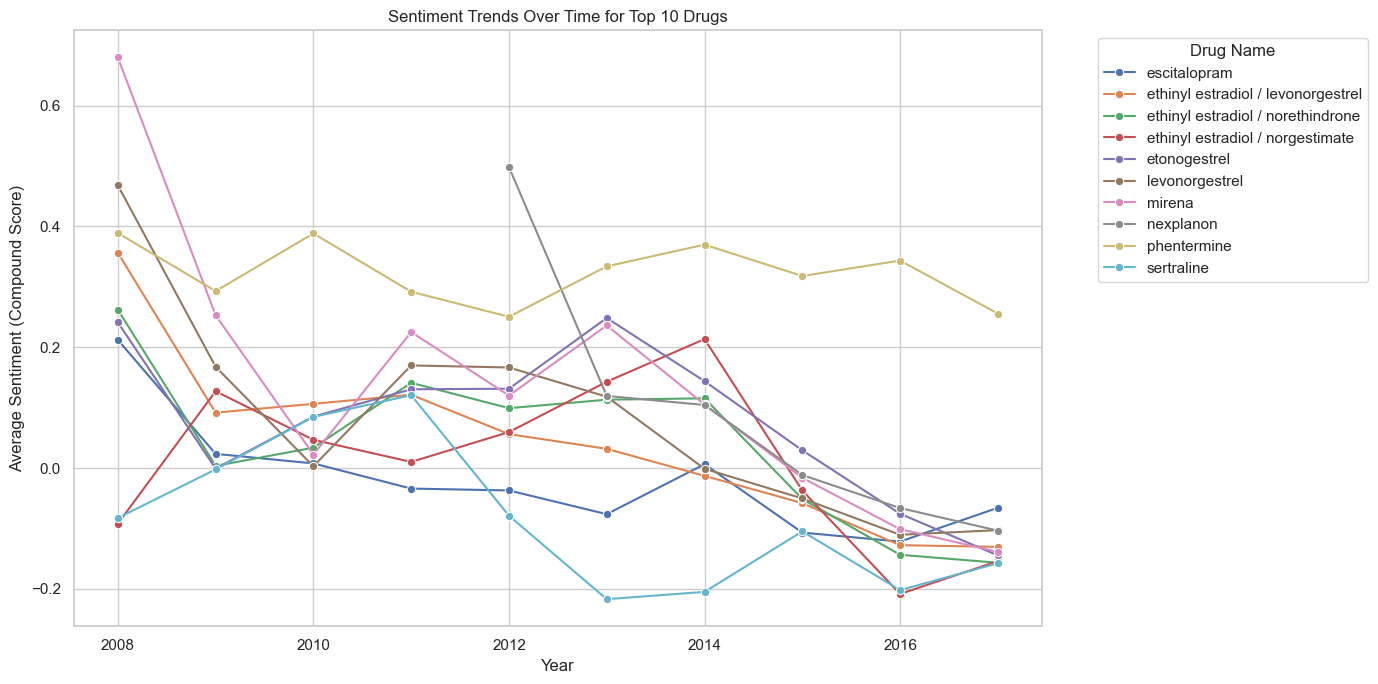

In [175]:
# Visualize sentiment trends over time for top drugs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_sentiment, x='year', y='compound', hue='drugName_clean', marker='o')
plt.title("Sentiment Trends Over Time for Top 10 Drugs")
plt.xlabel("Year")
plt.ylabel("Average Sentiment (Compound Score)")
plt.legend(title="Drug Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Sentiment across drugs

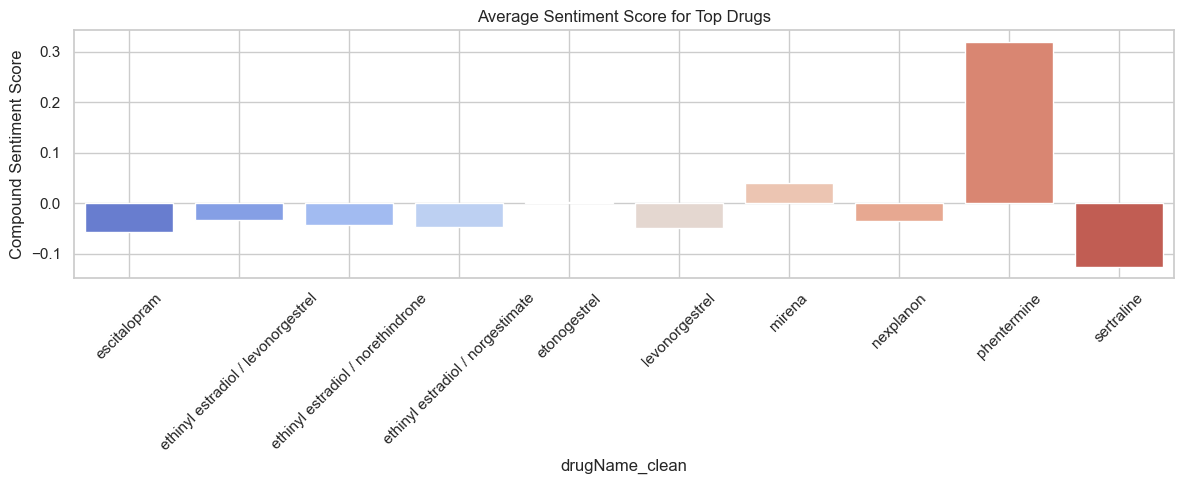

In [176]:
# Compute average sentiment per drug (across all reviews)
drug_sentiments = sil_df.groupby('drugName_clean')['compound'].mean().reset_index()

# Get the top 10 most frequently mentioned drugs again
top_drug_counts = sil_df['drugName_clean'].value_counts().head(10).index

# Filter sentiment data to keep only those top drugs
top_sentiments = drug_sentiments[drug_sentiments['drugName_clean'].isin(top_drug_counts)]

# Create a color list from the palette
colors = sns.color_palette('coolwarm', len(top_sentiments))

# Plot bar chart of average sentiment for top drugs
plt.figure(figsize=(12, 5))
sns.barplot(
    data=top_sentiments,
    x='drugName_clean',
    y='compound',
    hue='drugName_clean',         # Required to avoid seaborn deprecation warning
    palette='coolwarm',
    dodge=False,                  # Prevents bars from splitting when hue is used
    legend=False                  # Legend is unnecessary since x-axis already shows drug names
)
plt.title("Average Sentiment Score for Top Drugs")
plt.ylabel("Compound Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
display(top_cond)

Index(['birth control', 'depression', 'pain', 'anxiety', 'acne',
       'bipolar disorde', 'weight loss', 'obesity', 'insomnia', 'adhd'],
      dtype='object', name='condition_clean')

In [178]:
# Load side effect data from SIDER database
from pathlib import Path
import pandas as pd

file_path = Path(r"C:\Users\Aishwarya\OneDrive\Desktop\Kaggle\datasets\meddra_all_se.tsv")

sider_df = pd.read_csv(file_path, 
                       sep='\t', 
                       header=None, 
                       names=['stitch_compound_id', 'umls_id', 'side_effect', 'frequency', 'side_effect_name', 'placebo', 'source'])


In [124]:
display(sider_df)

,stitch_compound_id,umls_id,side_effect,frequency,side_effect_name,placebo,source
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps,NaN
1,CID100000085,CID000010917,C0000729,PT,C0000737,Abdominal pain,NaN
2,CID100000085,CID000010917,C0000737,LLT,C0000737,Abdominal pain,NaN
3,CID100000085,CID000010917,C0000737,PT,C0687713,Gastrointestinal pain,NaN
4,CID100000085,CID000010917,C0000737,PT,C0000737,Abdominal pain,NaN
...,...,...,...,...,...,...,...
309844,CID171306834,CID071306834,C3203358,PT,C1145670,Respiratory failure,NaN
309845,CID171306834,CID071306834,C3665386,LLT,C3665386,Abnormal vision,NaN
309846,CID171306834,CID071306834,C3665386,PT,C3665347,Visual impairment,NaN
309847,CID171306834,CID071306834,C3665596,LLT,C3665596,Warts,NaN


In [179]:
# Get unique list of placebo side effect names (used for text matching)
side_effects = sider_df['placebo'].str.lower().unique().tolist()

In [126]:
display(side_effects)

['abdominal cramps',
 'abdominal pain',
 'gastrointestinal pain',
 'amblyopia',
 'anaemia',
 'anorexia',
 'decreased appetite',
 'anxiety',
 'arrhythmia',
 'asthenia',
 'atrial fibrillation',
 'back pain',
 'bronchitis',
 'cardiovascular disorder',
 'chest pain',
 'infection',
 'constipation',
 'cough',
 'depression',
 'diarrhoea',
 'dizziness',
 'dysgeusia',
 'dyspepsia',
 'dyspnoea',
 'rash',
 'dermatitis',
 'eye disorder',
 'body temperature increased',
 'gastritis',
 'gastrointestinal disorder',
 'headache',
 'haemorrhage',
 'haemoglobin',
 'hypercalcaemia',
 'hyperkalaemia',
 'hypersensitivity',
 'hypertension',
 'hypotension',
 'influenza',
 'cramps of lower extremities',
 'muscle spasms',
 'melaena',
 'hypertonia',
 'nausea',
 'pain',
 'palpitations',
 'parathyroid disorder',
 'paraesthesia',
 'pharyngitis',
 'pruritus',
 'renal failure',
 'rhinitis',
 'convulsion',
 'sinusitis',
 'tachycardia',
 'urinary tract infection',
 'angiopathy',
 'vertigo',
 'vomiting',
 'weight increas

In [180]:
import pandas as pd

# Define a function to find matching side effects within a review
def match_side_effects(review, side_effects):
    matched_side_effects = []
    for side_effect in side_effects:
        if side_effect in review.lower():
            matched_side_effects.append(side_effect)
    return matched_side_effects

# Apply side effect matching to all reviews
sil_df['matched_side_effects'] = sil_df['review'].apply(lambda review: match_side_effects(review, side_effects))

# Preview matched side effects
sil_df[['review', 'matched_side_effects']]


,review,matched_side_effects
0,"""It has no side effect, I take it in combinati...",[]
1,"""My son is halfway through his fourth week of ...",[tic]
2,"""I used to take another oral contraceptive, wh...",[]
3,"""This is my first time using any form of birth...",[]
4,"""Suboxone has completely turned my life around...",[constipation]
...,...,...
272103,"""i had tried many medications to level out my ...","[depression, bipolar disorder, mania, tic]"
272104,"""had partial thyroid removal with benign tumor...","[welts, fall]"
272105,"""my experience with risperdal started when i f...",[depression]
272106,"""my elderly dad was prescribed a low dose of a...","[anxiety, delirium, hallucination]"


In [ ]:
# Expanding the list of matched side effects to count each side effect separately
side_effects_expanded = sil_df.explode('matched_side_effects')

# Count occurrences of each side effect
side_effect_counts = side_effects_expanded['matched_side_effects'].value_counts().reset_index()
side_effect_counts.columns = ['side_effect_name', 'count']

# Display the most common side effects
print(side_effect_counts)


               side_effect_name  count
0                          pain  57795
1                           tic  51695
2                       anxiety  29137
3                          ache  27270
4                    depression  23059
...                         ...    ...
1493  hdl cholesterol increased      1
1494               sacroiliitis      1
1495        portal hypertension      1
1496                 taste sour      1
1497          hodgkin's disease      1

[1498 rows x 2 columns]


In [131]:
display(sil_df.head())

,drugName_clean,condition_clean,review,rating,date,sentiment,compound,sentiment_label,year,matched_side_effects
0,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,-0.2960,-0.2960,negative,2012,[]
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,0.9174,0.9174,positive,2010,[tic]
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,0.6160,0.6160,positive,2009,[]
3,ortho evra,birth control,"""This is my first time using any form of birth...",8.0,2015-11-03,0.7184,0.7184,positive,2015,[]
4,buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,0.9403,0.9403,positive,2016,[constipation]


In [184]:
# Filter dataset to include only top drugs
top_drugs = sil_df['drugName_clean'].value_counts().nlargest(10).index.tolist()
top_drugs_df = sil_df[sil_df['drugName_clean'].isin(top_drugs)].copy()

# Explode side effects list to long format for aggregation
exploded_df = top_drugs_df.explode('matched_side_effects')


In [185]:
# Count frequency of each side effect per drug
side_effects_by_drug = (
    exploded_df
    .groupby(['drugName_clean', 'matched_side_effects'])
    .size()
    .reset_index(name='count')
)
display(side_effects_by_drug)

,drugName_clean,matched_side_effects,count
0,escitalopram,accident,5
1,escitalopram,ache,232
2,escitalopram,acne,4
3,escitalopram,adjustment disorder,3
4,escitalopram,adverse reaction,2
...,...,...,...
1939,sertraline,weight increased,2
1940,sertraline,withdrawal symptom,16
1941,sertraline,withdrawal syndrome,2
1942,sertraline,worry,66


In [186]:
# Select top 5 most common side effects for each drug
top_side_effects_per_drug = (
    side_effects_by_drug
    .sort_values(['drugName_clean', 'count'], ascending=[True, False])
    .groupby('drugName_clean')
    .head(5)  # Top 5 side effects per drug
)
display(top_side_effects_per_drug)

,drugName_clean,matched_side_effects,count
16,escitalopram,anxiety,1392
53,escitalopram,depression,775
189,escitalopram,tic,456
142,escitalopram,panic attack,378
1,escitalopram,ache,232
217,ethinyl estradiol / levonorgestrel,acne,869
372,ethinyl estradiol / levonorgestrel,tic,737
320,ethinyl estradiol / levonorgestrel,mood swings,622
334,ethinyl estradiol / levonorgestrel,pain,509
216,ethinyl estradiol / levonorgestrel,ache,439


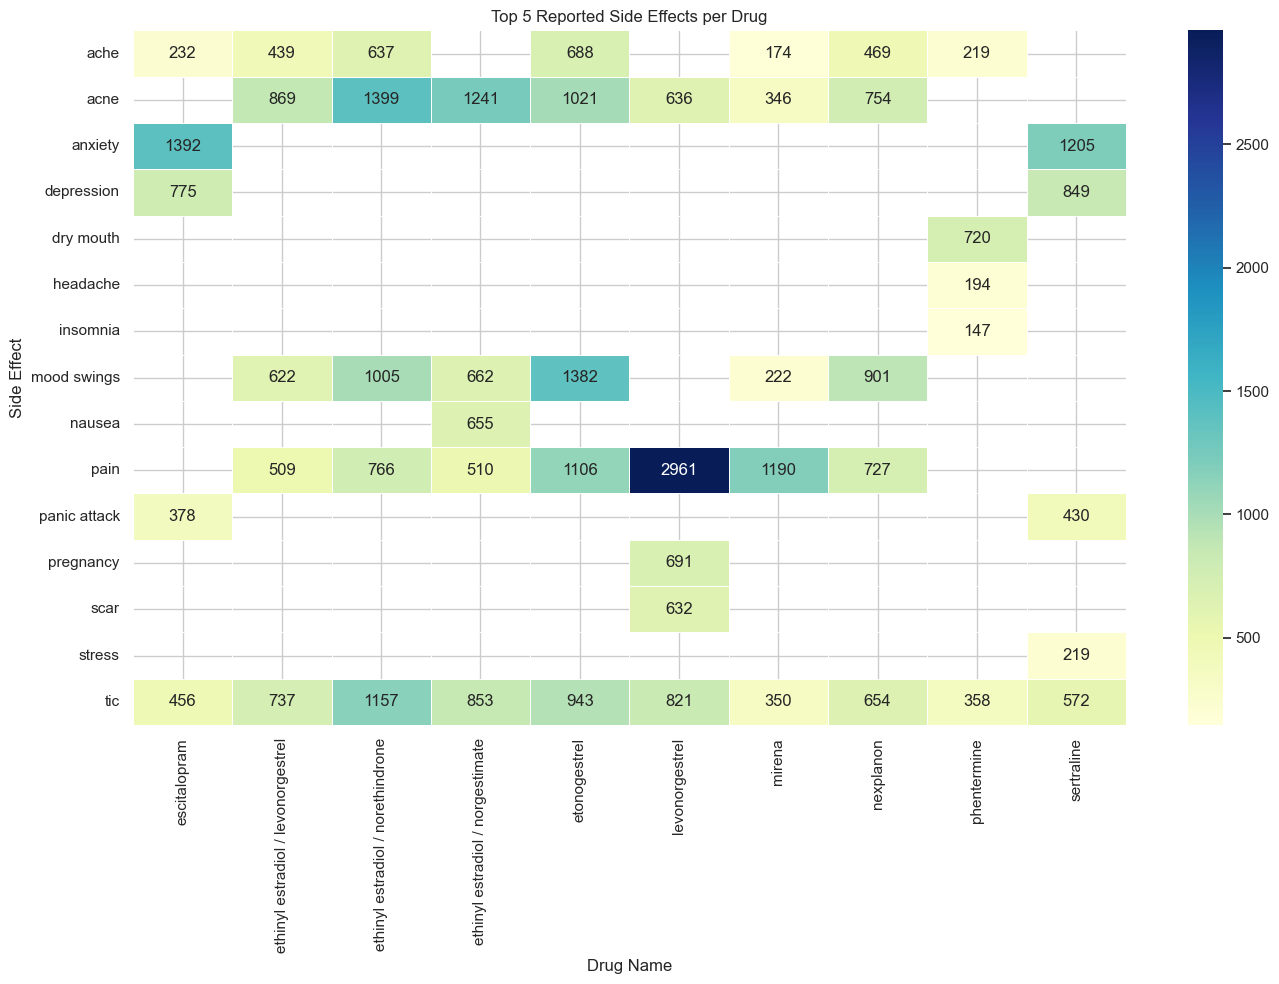

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot for heatmap
heatmap_data = top_side_effects_per_drug.pivot(index='matched_side_effects',
                                               columns='drugName_clean',
                                               values='count')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Top 5 Reported Side Effects per Drug")
plt.xlabel("Drug Name")
plt.ylabel("Side Effect")
plt.tight_layout()
plt.show()
